In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy.io import loadmat

import warnings
warnings.filterwarnings("ignore")

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_at3 = loadmat('Données/data_at3.mat') 
data_cars=data_at3["data_cars"]

#Conversion en dataframe
data_cars=pd.DataFrame(data_cars)
#data_cars.isna()
#pas de valeurs manquantes
#data_cars



**QUESTION 1: Analyse de la disperson des valeurs**

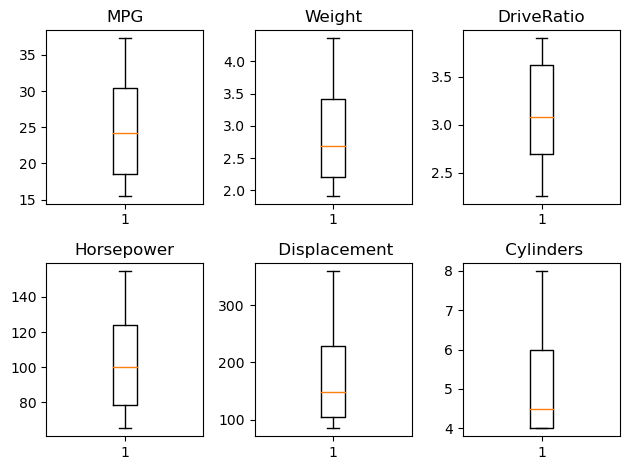

In [4]:
fig, axs = plt.subplots(2, 3)
axs[0, 0].boxplot(data_cars[0])
axs[0, 0].set_title('MPG')
axs[0, 1].boxplot(data_cars[1])
axs[0, 1].set_title('Weight')
axs[0, 2].boxplot(data_cars[2])
axs[0, 2].set_title('DriveRatio')


axs[1, 0].boxplot(data_cars[3])
axs[1, 0].set_title('Horsepower')
axs[1, 1].boxplot(data_cars[4])
axs[1, 1].set_title(' Displacement')
axs[1, 2].boxplot(data_cars[5])
axs[1, 2].set_title(' Cylinders')
plt.tight_layout()
plt.show()


En analysant ces graphiques, nous pouvons remarquer que:
* la dispersion des valeurs est plus importantes pour les variables **MPG** (efficacité énergetique), **Horsepower** (puissance du moteur) et **Displacement** (capacité totale du moteur),
* les valeurs des variables **MPG** et **Horsepower** on une tendance probablement symétrique, tandis que celles des autres variables ont des tendances probablement asymétriques, avec plus de valeurs au dessus de la médiane pour chacune des variables.





In [5]:
pd.DataFrame(np.corrcoef(data_cars.transpose()))


,0,1,2,3,4,5
0,1.000000,-0.903071,0.417225,-0.871282,-0.786048,-0.805511
1,-0.903071,1.000000,-0.687880,0.917220,0.950765,0.916678
2,0.417225,-0.687880,1.000000,-0.588906,-0.798273,-0.692150
3,-0.871282,0.917220,-0.588906,1.000000,0.871799,0.863847
4,-0.786048,0.950765,-0.798273,0.871799,1.000000,0.940281
5,-0.805511,0.916678,-0.692150,0.863847,0.940281,1.000000


On peut voir sur cette matrice des corrélations que les variables sont quasiment toutes corrélées entre elles.

In [6]:
# On va centrer les données
# moyenne=np.mean(data_cars, axis=0)
# data_cars_centre=data_cars-moyenne

# print(data_cars_centre)

from sklearn.preprocessing import StandardScaler
SS = StandardScaler().fit(data_cars)
data_cars_centre = SS.transform(data_cars)

**PCA**

In [7]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import scale
pca = PCA()
pca.fit(data_cars_centre)

PCA()

In [8]:
#le tableau des variances expliquées
print("le tableau des variances expliquées pour chaque variable (des valeurs propres):\n ", pca.explained_variance_)

print("le tableau des ratios des variances expliquées pour chaque variable :\n", pca.explained_variance_)

le tableau des variances expliquées pour chaque variable (des valeurs propres):
  [5.1761924  0.66672719 0.13673036 0.11317654 0.0502793  0.01905637]
le tableau des ratios des variances expliquées pour chaque variable :
 [5.1761924  0.66672719 0.13673036 0.11317654 0.0502793  0.01905637]


In [9]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(6)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,5.176192,84.0,84.0
1,Dim2,0.666727,11.0,95.0
2,Dim3,0.136730,2.0,97.0
3,Dim4,0.113177,2.0,99.0
4,Dim5,0.050279,1.0,100.0
5,Dim6,0.019056,0.0,100.0


<Axes: xlabel='Dimension'>

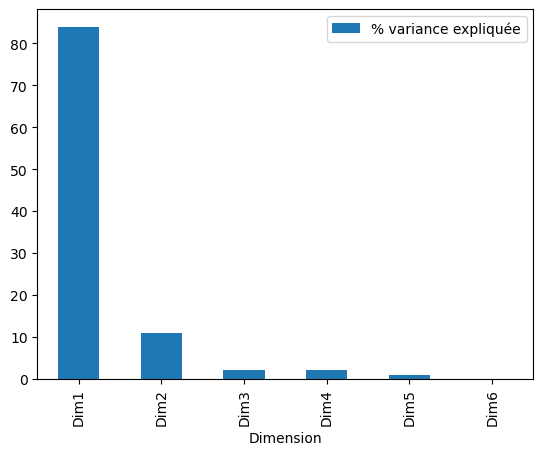

In [10]:
#Représentation en diagramme en barres les variances expliquées
eig.plot.bar(x = "Dimension", y = "% variance expliquée")

Nous pouvons voir ce graphe  que les variables **MPG** (efficacité énergetique) et **weight** (poids des voiture) expliquent **95%**  de la variance du nuage de points. 

On peut donc conclure que seulement deux dimensions suffisent pour représenter **95%** de la variance des données.

In [11]:
# On extrait les deux vecteurs propres qui correspondent aux deux valeurs propres les plus fortes 

VP_MPG=pca.components_[0] ; VP_Horse=pca.components_[1]



**Représentation graphique des observations projetées**

In [12]:
#On determinent d'abord les coordonnées des individus (voitures)
coord_pca = pca.transform(data_cars_centre)
voitures=data_at3['name_car']
# les coordonnées sur les deux composantes principales
coord_pca_2D=pd.DataFrame({
    "Dim1" : coord_pca[:,0], 
    "Dim2" : coord_pca[:,1],
     "voiture" : voitures
})
coord_pca_2D

,Dim1,Dim2,voiture
0,4.060587,0.403652,Buick Estate Wagon
1,4.058195,-0.377284,Ford Country Squire Wagon
2,2.668039,-0.264906,Chevy Malibu Wagon
3,3.852878,-0.285830,Chrysler LeBaron Wagon
4,-2.465620,0.283805,Chevette
5,-1.024479,-0.296046,Toyota Corona
6,-1.532567,0.501431,Datsun 510
7,-2.110493,-0.243305,Dodge Omni
8,-0.593373,1.717117,Audi 5000
9,0.841887,1.530867,Volvo 240 GL


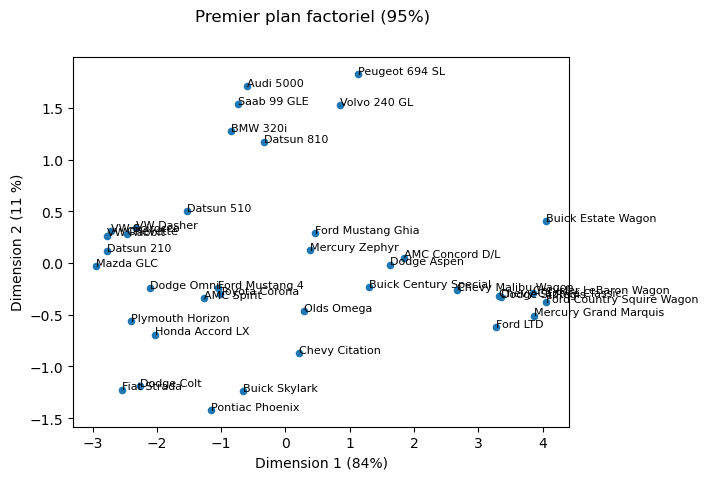

In [13]:
# le nuage des points avec les identifiants des voitures
fig, ax = plt.subplots()
coord_pca_2D.plot.scatter("Dim1", "Dim2", ax = ax) 

# boucle sur chaque voiture
for k in coord_pca_2D.iterrows():
    ax.annotate(k[1]["voiture"], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 8)
plt.xlabel("Dimension 1 (84%)") 
plt.ylabel("Dimension 2 (11 %)")
plt.suptitle("Premier plan factoriel (95%)")
plt.show()

In [14]:
n =data_cars.shape[0] # nb individus
p = data_cars.shape[1] # nb variables
eigval = (n-1) / n * pca.explained_variance_ # valeurs propres
sqrt_eigval = np.sqrt(eigval) # racine carrée des valeurs propres
corvar = np.zeros((p,p)) # matrice vide pour avoir les coordonnées
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
# on modifie pour avoir un dataframe

variables=np.array(['MPG', 'Weight', 'DriveRatio', 'Horsepower', 'Displacement', 'Cylinders'])
coordvar = pd.DataFrame({'variables': variables, 'COR_1': corvar[:,0], 'COR_2': corvar[:,1]})
coordvar

,variables,COR_1,COR_2
0,MPG,-0.879099,-0.421426
1,Weight,0.982849,0.079905
2,DriveRatio,-0.750726,0.641336
3,Horsepower,0.936527,0.188350
4,Displacement,0.974830,-0.135071
5,Cylinders,0.954046,-0.012857


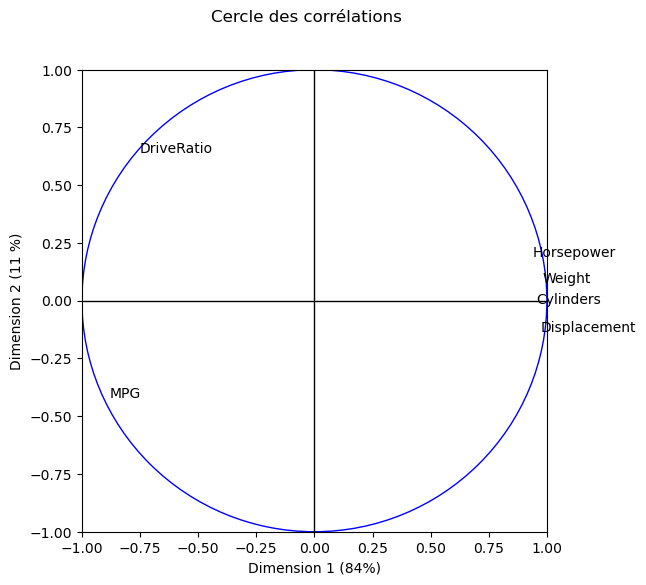

In [15]:
# Création d'une figure vide (avec des axes entre -1 et 1 + le titre)
fig, axes = plt.subplots(figsize = (6,6))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
# Ajout des axes
axes.axvline(x = 0, color = 'black', linestyle = '-', linewidth =1 )
axes.axhline(y = 0, color = 'black', linestyle = '-', linewidth = 1)
plt.xlabel("Dimension 1 (84%)") 
plt.ylabel("Dimension 2 (11 %)")
# Ajout des noms des variables
for j in range(p):
    axes.text(coordvar["COR_1"][j],coordvar["COR_2"][j], coordvar["variables"][j])
# Ajout du cercle
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()